In [41]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

/var/folders/cg/6bd366p92fbb82w4cdb91yd40000gn/T/ipykernel_3091/2462983565.py:7: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [42]:
adversarial = "datasets/processed/results/adversarial.csv"
baseline = "datasets/processed/results/baseline.csv"
monthly = "datasets/processed/results/monthly.csv"

In [43]:
def get_df(path):
    df = pd.read_csv(path)
    df["last_month"] = df["last_month"].astype("str")
    df["last_month_date"] =df["last_month"].apply(lambda x: x[0:4] + "-"+ x[4:6] + "-01")
    df["last_month_date"] = df["last_month_date"].astype("datetime64[ns]")
    
    
    df['last_month_date'] = pd.to_datetime(df['last_month_date'], format="%Y%m") + MonthEnd(0)
    df = df.sort_values(by="last_month_date").reset_index(drop=True)
    
    return df

In [44]:
df_adv = get_df(adversarial)
df_base = get_df(baseline)
df_monthly = get_df(monthly)

In [45]:
df_base["stage"] = df_base["stage"].map({
    "baseline": "All features",
    "baseline_sin_foto_mes": "No foto_mes",
})

In [46]:
df_monthly["stage"] = df_monthly["stage"].map({
    "monthly": "All features",
    "monthly_sin_foto_mes": "No foto_mes",
})

In [47]:
df_adv["stage"] = df_adv["stage"].map({
    "adversarial": "All features - stacked",
    "adversarial_sin_foto_mes": "No foto_mes - stacked",
    "adversarial_only_last": "All features - last month",
    "adversarial_only_last_sin_foto_mes": "No foto_mes - last month",
})

## Baseline vs Monthly

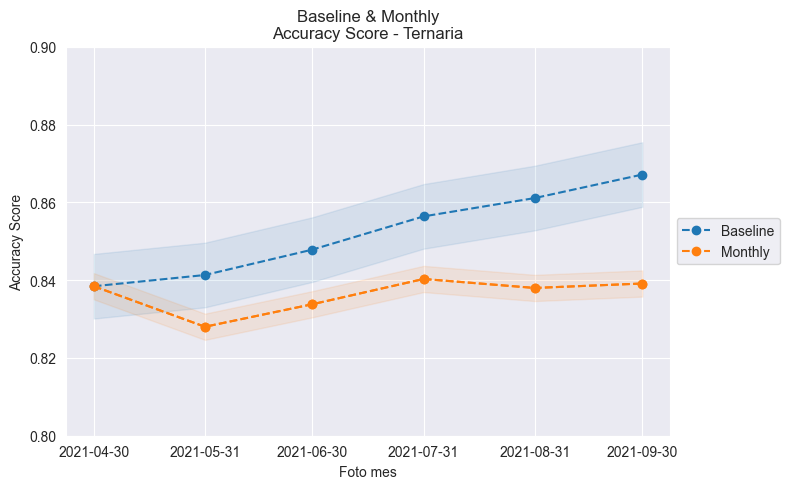

In [48]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2.iloc[0] = df_temp_1.iloc[0]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Baseline", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Monthly", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Baseline & Monthly\nAccuracy Score - Ternaria")
plt.xticks(df_base["last_month_date"].unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_vs_monthly_ternaria.png", transparent=True, bbox_inches='tight')

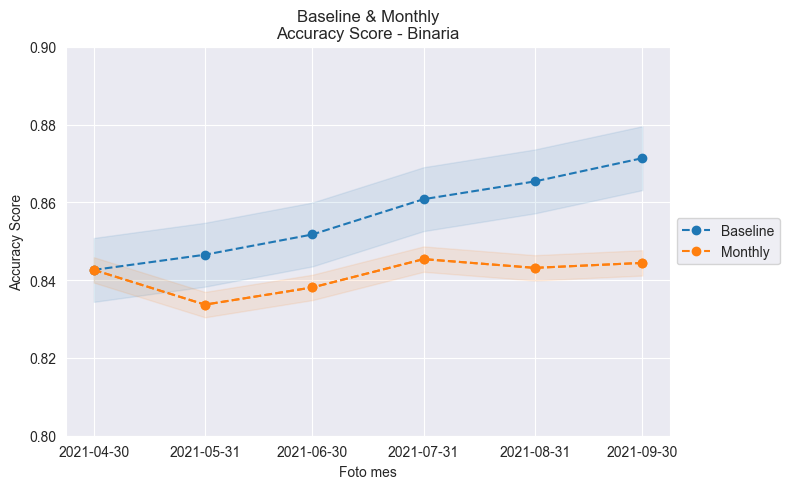

In [49]:
fig = plt.figure(figsize=(8, 5))

metric = "real_binaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2.iloc[0] = df_temp_1.iloc[0]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Baseline", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Monthly", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Baseline & Monthly\nAccuracy Score - Binaria")
plt.xticks(df_base["last_month_date"].unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_vs_monthly_binaria.png", transparent=True, bbox_inches='tight')

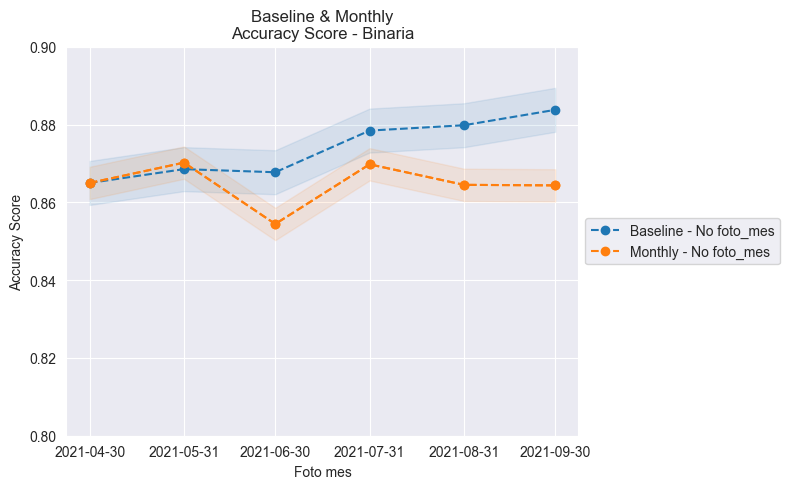

In [50]:
fig = plt.figure(figsize=(8, 5))

metric = "real_binaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["No foto_mes"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["No foto_mes"])]
df_temp_2.iloc[0] = df_temp_1.iloc[0]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Baseline - No foto_mes", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Monthly - No foto_mes", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Baseline & Monthly\nAccuracy Score - Binaria")
plt.xticks(df_base["last_month_date"].unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_vs_monthly_binaria_sin_foto_mes.png", transparent=True, bbox_inches='tight')

### Baseline

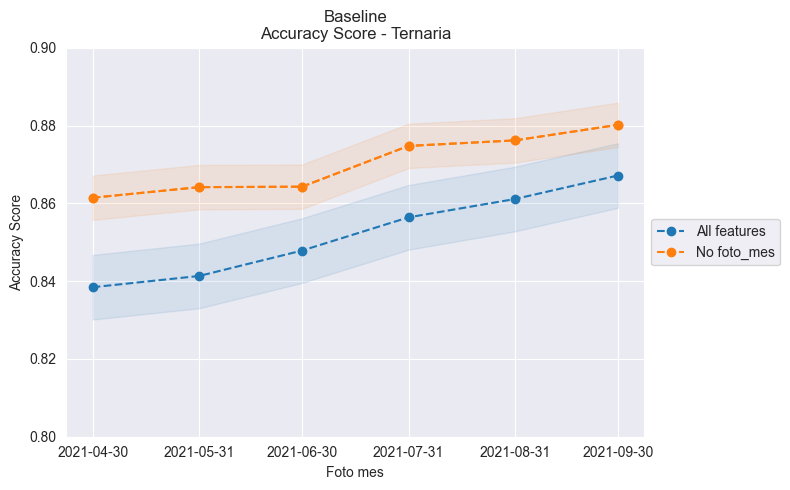

In [51]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_base[df_base["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="All features", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="No foto_mes", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Baseline\nAccuracy Score - Ternaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_base["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_ternaria_sin_foto_mes.png", transparent=True, bbox_inches='tight')

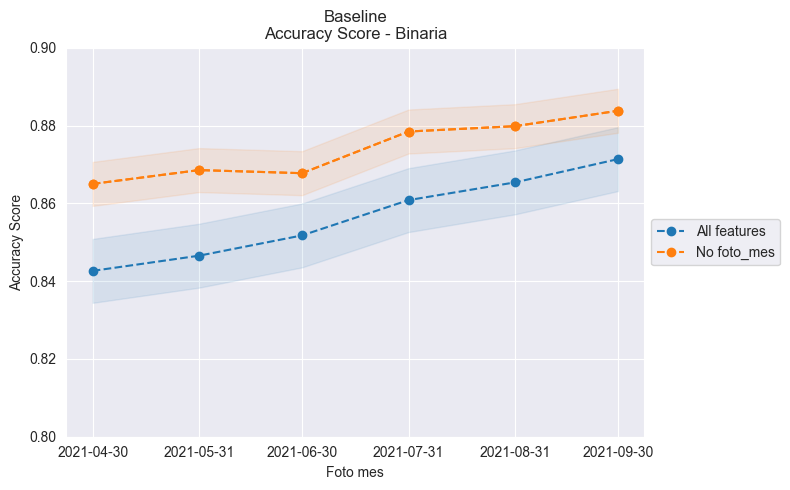

In [52]:
fig = plt.figure(figsize=(8, 5))

metric = "real_binaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_base[df_base["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="All features", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="No foto_mes", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Baseline\nAccuracy Score - Binaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_base["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_binaria_sin_foto_mes.png", transparent=True, bbox_inches='tight')

#### Monthly

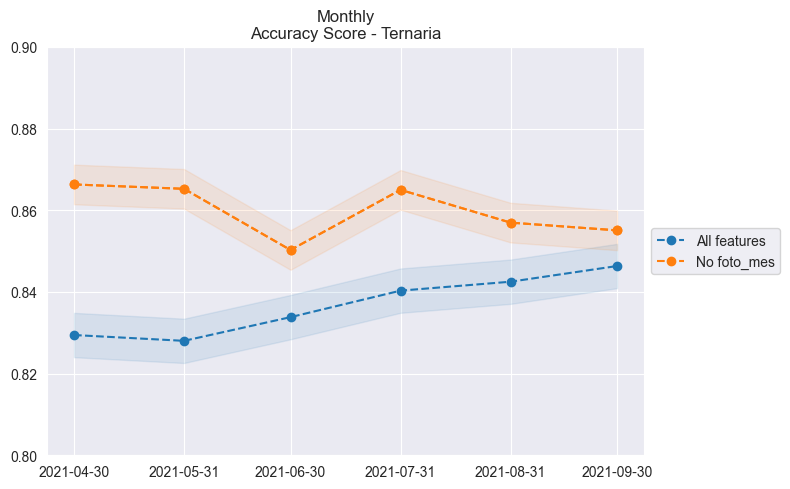

In [53]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="All features", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="No foto_mes", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Monthly\nAccuracy Score - Ternaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_monthly["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.tight_layout()
plt.show()

fig.savefig("images/monthly_ternaria_sin_foto_mes.png", transparent=True, bbox_inches='tight')

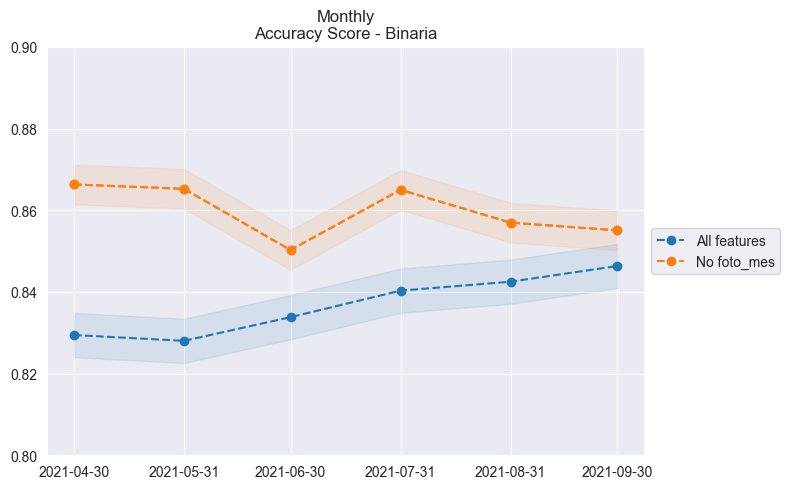

In [54]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="All features", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="No foto_mes", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Monthly\nAccuracy Score - Binaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_base["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.tight_layout()
plt.show()

fig.savefig("images/monthly_binaria.png", transparent=True, bbox_inches='tight')

### Adversarial

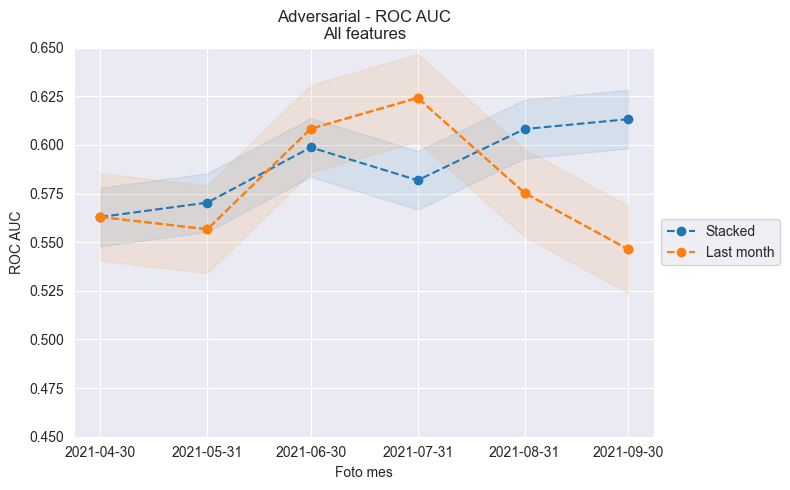

In [55]:
fig = plt.figure(figsize=(8, 5))

metric = "training_roc_auc"

df_temp_1 = df_adv[df_adv["stage"].isin(["All features - stacked"])]
df_temp_2 = df_adv[df_adv["stage"].isin(["All features - last month"])]
df_temp_2.iloc[0] = df_temp_1.iloc[0]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Stacked", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="Last month", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Adversarial - ROC AUC\nAll features")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_adv["last_month_date"].unique())
plt.ylim(0.45, .65)
plt.xlabel("Foto mes")
plt.ylabel("ROC AUC")
plt.tight_layout()
plt.show()

fig.savefig("images/adversarial.png", transparent=True, bbox_inches='tight')

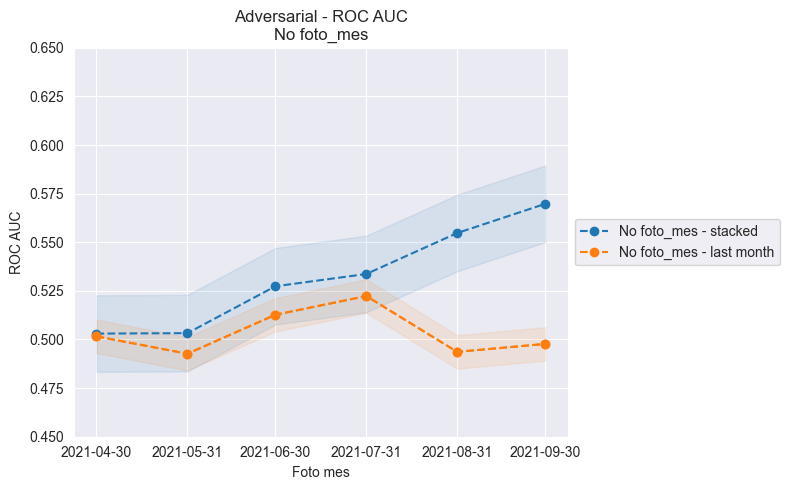

In [56]:
fig = plt.figure(figsize=(8, 5))


metric = "training_roc_auc"
df_temp_1 = df_adv[df_adv["stage"].isin(["No foto_mes - stacked"])]
df_temp_2 = df_adv[df_adv["stage"].isin(["No foto_mes - last month"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="No foto_mes - stacked", color="C0")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = 1.96 * np.std(y)/np.sqrt(len(x))

plt.plot(x, y, 'o--', label="No foto_mes - last month", color="C1")
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, (y-ci), (y+ci), alpha=.1, color="C1")

plt.title("Adversarial - ROC AUC\nNo foto_mes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.45, .65)
plt.xticks(df_adv["last_month_date"].unique())
plt.xlabel("Foto mes")
plt.ylabel("ROC AUC")
plt.tight_layout()
plt.show()

fig.savefig("images/adversarial_sin_foto_mes.png", transparent=True, bbox_inches='tight')

### Ganancia - Baseline

In [57]:
df_gan = pd.read_parquet("datasets/processed/ganancia_maxima.parquet")

In [58]:
baseline_preds = {
    "all_features":  glob.glob("datasets/processed/predictions/baseline/all_features/*.csv"),
    "no_foto_mes": glob.glob("datasets/processed/predictions/baseline/no_foto_mes/*.csv")
}

In [59]:
ganancias = []
for features,files in baseline_preds.items():
    for file in files:
        df_preds_ = pd.read_csv(file)
        df_preds_ = df_preds_.sort_values(by="prediction", ascending=False, ignore_index=True)
        df_preds = df_preds_[["foto_mes", "ganancia"]].copy()
    
        for cut in [9000, 9500, 10000, 10500, 11000]:
            df_preds.loc[0:cut, "Predicted"] = 1
            df_preds.loc[cut:, "Predicted"] = 0
            df_preds[f"gan_total_baseline_{features}_{cut}"] = df_preds["Predicted"] * df_preds["ganancia"] 
            
        ganancias.append(df_preds.groupby("foto_mes", as_index=False).sum())


In [60]:
df_ganancias = pd.concat(ganancias, ignore_index=True).groupby("foto_mes").sum()
df_ganancias

,ganancia,Predicted,gan_total_baseline_all_features_9000,gan_total_baseline_all_features_9500,gan_total_baseline_all_features_10000,gan_total_baseline_all_features_10500,gan_total_baseline_all_features_11000,gan_total_baseline_no_foto_mes_9000,gan_total_baseline_no_foto_mes_9500,gan_total_baseline_no_foto_mes_10000,gan_total_baseline_no_foto_mes_10500,gan_total_baseline_no_foto_mes_11000
foto_mes,,,,,,,,,,,,
202104,-1643292000,22000.0,1.325620e+08,1.321090e+08,1.319330e+08,1.328650e+08,1.326890e+08,1.195430e+08,1.196440e+08,1.183600e+08,1.201230e+08,1.221630e+08
202105,-1797720000,22000.0,6.497400e+07,6.507500e+07,6.462200e+07,6.527700e+07,6.537800e+07,5.167800e+07,5.150200e+07,5.132600e+07,5.087300e+07,5.125100e+07
202106,-1706884000,22000.0,8.685700e+07,8.945100e+07,9.121400e+07,9.131500e+07,9.169300e+07,7.633100e+07,7.975600e+07,8.013400e+07,8.272800e+07,8.227500e+07
202107,-1602522000,22000.0,1.123410e+08,1.157660e+08,1.161440e+08,1.190150e+08,1.185620e+08,1.206510e+08,1.249070e+08,1.272240e+08,1.281560e+08,1.277030e+08
202108,88383390000,22000.0,2.198982e+09,2.328996e+09,2.459287e+09,2.590963e+09,2.720977e+09,2.213663e+09,2.343123e+09,2.472583e+09,2.603428e+09,2.732334e+09
202109,-2313318000,22000.0,-6.300000e+07,-6.650000e+07,-7.000000e+07,-7.350000e+07,-7.700000e+07,-6.300000e+07,-6.650000e+07,-7.000000e+07,-7.350000e+07,-7.700000e+07


In [61]:
df_gan_ = df_gan.copy()
df_gan_ = df_gan_.merge(df_ganancias, on="foto_mes", how="left")

In [62]:
df_gan_.iloc[-2, 2:] = np.nan
df_gan_.iloc[-1, 2:] = np.nan

In [63]:
df_gan_.index = df_gan["foto_mes_date"]
df_gan_ = df_gan_.drop(columns=["ganancia", "Predicted", "foto_mes", "foto_mes_date", "ganancia_max"])

In [64]:
df_gan_ = df_gan_.interpolate(method='spline', order=1, limit_direction="forward")

In [65]:
cols_all = []
for col in df_gan_.columns:
    if "all_features" in col:
        cols_all.append(col)

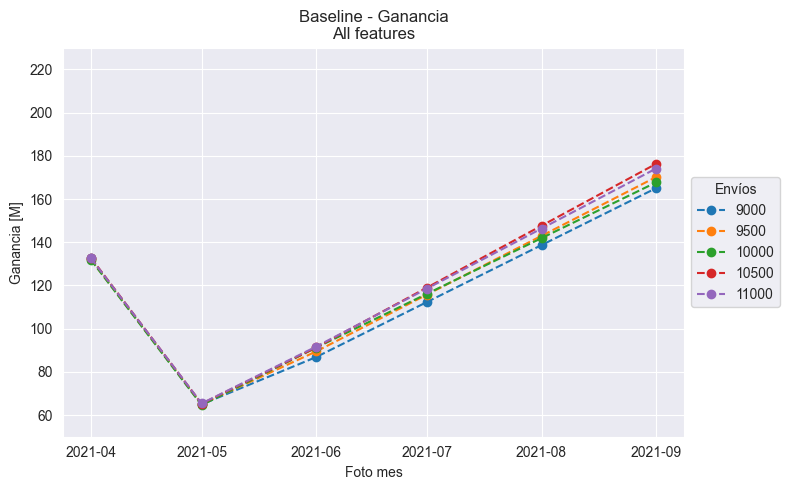

In [66]:
fig = plt.figure(figsize=(8, 5))

for col in cols_all:
    plt.plot(df_gan_[col]/1000000, 'o--', label=col.replace("gan_total_baseline_all_features_", ""))

plt.title("Baseline - Ganancia\nAll features")
plt.xlabel("Foto mes")
plt.ylabel("Ganancia [M]")
plt.legend(title='Envíos', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.ylim(50, 230)
plt.show()

fig.savefig("images/ganancia_baseline_all_features.png", transparent=True, bbox_inches='tight')

In [67]:
cols_all = []
for col in df_gan_.columns:
    if "foto_mes" in col:
        cols_all.append(col)

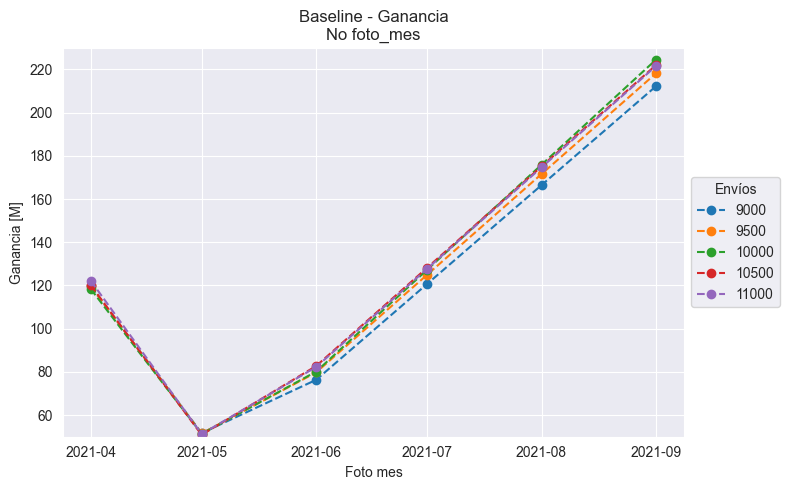

In [68]:
fig = plt.figure(figsize=(8, 5))
for col in cols_all:
    plt.plot(df_gan_[col]/1000000, 'o--', label=col.replace("gan_total_baseline_no_foto_mes_", ""))
plt.legend(title='Envíos', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Baseline - Ganancia\nNo foto_mes")
plt.xlabel("Foto mes")
plt.ylabel("Ganancia [M]")
plt.tight_layout()
plt.ylim(50, 230)
plt.show()

fig.savefig("images/ganancia_baseline_no_foto_mes.png", transparent=True, bbox_inches='tight')

### Ganancia - Monthly

In [69]:
df_gan = pd.read_parquet("datasets/processed/ganancia_maxima.parquet")

In [70]:
monthly_preds = {
    "all_features":  glob.glob("datasets/processed/predictions/monthly/all_features/*.csv"),
    "no_foto_mes": glob.glob("datasets/processed/predictions/monthly/no_foto_mes/*.csv")
}

In [71]:
ganancias = []
for features,files in monthly_preds.items():
    for file in files:
        df_preds_ = pd.read_csv(file)
        df_preds_ = df_preds_.sort_values(by="prediction", ascending=False, ignore_index=True)
        df_preds = df_preds_[["foto_mes", "ganancia"]].copy()
    
        for cut in [9000, 9500, 10000, 10500, 11000]:
            df_preds.loc[0:cut, "Predicted"] = 1
            df_preds.loc[cut:, "Predicted"] = 0
            df_preds[f"gan_total_monthly_{features}_{cut}"] = df_preds["Predicted"] * df_preds["ganancia"] 
            
        ganancias.append(df_preds.groupby("foto_mes", as_index=False).sum())


In [72]:
df_ganancias = pd.concat(ganancias, ignore_index=True).groupby("foto_mes").sum()
df_ganancias

,ganancia,Predicted,gan_total_monthly_all_features_9000,gan_total_monthly_all_features_9500,gan_total_monthly_all_features_10000,gan_total_monthly_all_features_10500,gan_total_monthly_all_features_11000,gan_total_monthly_no_foto_mes_9000,gan_total_monthly_no_foto_mes_9500,gan_total_monthly_no_foto_mes_10000,gan_total_monthly_no_foto_mes_10500,gan_total_monthly_no_foto_mes_11000
foto_mes,,,,,,,,,,,,
202104,-1643292000,22000.0,1.256370e+08,1.240760e+08,1.233460e+08,1.245550e+08,1.243790e+08,1.278530e+08,1.304470e+08,1.311020e+08,1.323110e+08,1.321350e+08
202105,-1797720000,22000.0,6.996000e+07,7.033800e+07,7.154700e+07,7.220200e+07,7.202600e+07,6.996000e+07,6.978400e+07,7.099300e+07,7.081700e+07,6.953300e+07
202106,-1706884000,22000.0,9.128900e+07,9.194400e+07,9.398400e+07,9.574700e+07,9.612500e+07,9.544400e+07,9.637600e+07,9.592300e+07,9.602400e+07,9.778700e+07
202107,-1602522000,22000.0,1.151110e+08,1.177050e+08,1.183600e+08,1.212310e+08,1.221630e+08,1.253600e+08,1.262920e+08,1.297170e+08,1.309260e+08,1.315810e+08
202108,88383390000,22000.0,2.183470e+09,2.314869e+09,2.446268e+09,2.579329e+09,2.711005e+09,2.185409e+09,2.315700e+09,2.447099e+09,2.578498e+09,2.709620e+09
202109,-2313318000,22000.0,-6.300000e+07,-6.650000e+07,-7.000000e+07,-7.350000e+07,-7.700000e+07,-6.300000e+07,-6.650000e+07,-7.000000e+07,-7.350000e+07,-7.700000e+07


In [73]:
df_gan_ = df_gan.copy()
df_gan_ = df_gan_.merge(df_ganancias, on="foto_mes", how="left")

In [74]:
df_gan_.iloc[-2, 2:] = np.nan
df_gan_.iloc[-1, 2:] = np.nan

In [75]:
df_gan_.index = df_gan["foto_mes_date"]
df_gan_ = df_gan_.drop(columns=["ganancia", "Predicted", "foto_mes", "foto_mes_date", "ganancia_max"])

In [76]:
df_gan_ = df_gan_.interpolate(method='spline', order=1, limit_direction="forward")

In [77]:
cols_all = []
for col in df_gan_.columns:
    if "all_features" in col:
        cols_all.append(col)

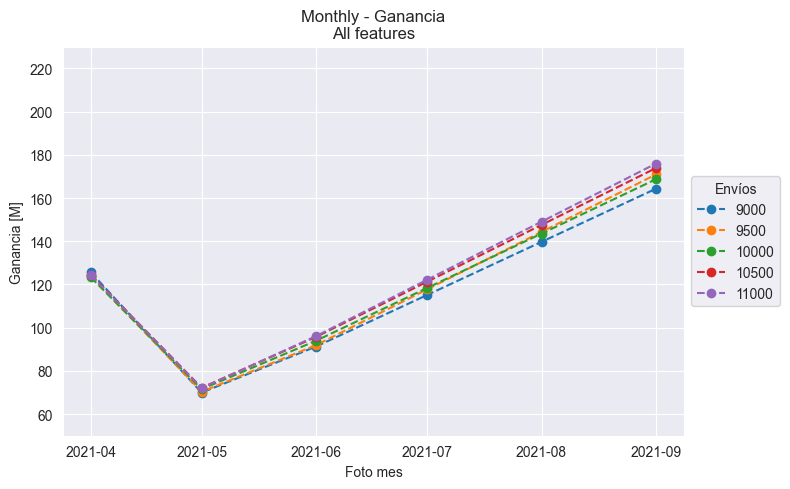

In [78]:
fig = plt.figure(figsize=(8, 5))
for col in cols_all:
    plt.plot(df_gan_[col]/1000000, 'o--', label=col.replace("gan_total_monthly_all_features_", ""))
plt.title("Monthly - Ganancia\nAll features")
plt.xlabel("Foto mes")
plt.ylabel("Ganancia [M]")
plt.legend(title="Envíos", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.ylim(50, 230)
plt.show()

fig.savefig("images/ganancia_monthly_all_features.png", transparent=True, bbox_inches='tight')

In [79]:
cols_all = []
for col in df_gan_.columns:
    if "foto_mes" in col:
        cols_all.append(col)

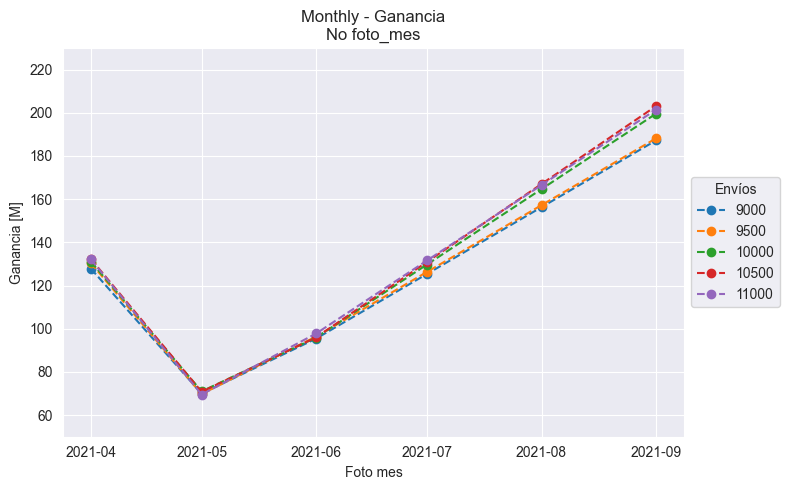

In [80]:
fig = plt.figure(figsize=(8, 5))

for col in cols_all:
    plt.plot(df_gan_[col]/1000000, 'o--', label=col.replace("gan_total_monthly_no_foto_mes_", ""))
plt.title("Monthly - Ganancia\nNo foto_mes")
plt.xlabel("Foto mes")
plt.ylabel("Ganancia [M]")
plt.legend(title="Envíos", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.ylim(50, 230)
plt.show()

fig.savefig("images/ganancia_monthly_no_foto_mes.png", transparent=True, bbox_inches='tight')